In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [7]:
import os
all_dfs = []
directory = os.fsencode("feature data/")
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("0.csv"): 
         all_dfs.append(pd.read_csv("feature data/" + filename, header=None))

In [4]:
df1_0 = pd.read_csv("data/01-0.csv", header=None)
df1_5 = pd.read_csv("data/01-5.csv", header=None)
df1_10 = pd.read_csv("data/01-10.csv", header=None)
df2_0 = pd.read_csv("data/02-0.csv", header=None)
df2_5 = pd.read_csv("data/02-5.csv", header=None)
df2_10 = pd.read_csv("data/02-10.csv", header=None)

In [8]:
data = pd.concat(all_dfs) # [df1_0, df1_5, df1_10, df2_0, df2_5, df2_10])
data

,0,1,2,3,4,5,6
0,0.0,0.193878,0.060185,0.181122,0.062500,0.344388,0.131944
1,0.0,0.185279,0.059908,0.159898,0.064516,0.327411,0.135945
2,0.0,0.183168,0.051454,0.148515,0.058166,0.316832,0.131991
3,0.0,0.178756,0.048611,0.168394,0.053241,0.341969,0.120370
4,0.0,0.180662,0.047506,0.152672,0.047506,0.318066,0.125891
...,...,...,...,...,...,...,...
16,10.0,0.173633,0.048295,0.173633,0.045455,0.392283,0.090909
17,10.0,0.169279,0.043732,0.178683,0.055394,0.288401,0.230321
18,10.0,0.174342,0.051672,0.177632,0.054711,0.365132,0.139818
19,10.0,0.166102,0.033639,0.176271,0.036697,0.362712,0.159021


In [3]:
data = pd.read_csv("feature data/scaled.csv")
data

,0,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,0.0,0.742409,0.493463,0.661817,0.454649,0.493465,0.412251
1,0.0,0.668379,0.490166,0.503346,0.476794,0.419178,0.429143
2,0.0,0.650205,0.389691,0.418349,0.407039,0.372883,0.412448
3,0.0,0.612220,0.355901,0.566777,0.352945,0.482880,0.363379
4,0.0,0.628623,0.342765,0.449387,0.289953,0.378285,0.386689
...,...,...,...,...,...,...,...
1887,10.0,0.568112,0.352149,0.605900,0.267421,0.703047,0.238977
1888,10.0,0.530622,0.297908,0.643606,0.376592,0.248476,0.827651
1889,10.0,0.574214,0.392277,0.635752,0.369097,0.584236,0.445496
1890,10.0,0.503266,0.177953,0.625595,0.171231,0.573648,0.526585


In [10]:
X = data.iloc[:, [i for i in range(1, 7)]]
Y = data.iloc[:, 0]
X

,1,2,3,4,5,6
0,0.193878,0.060185,0.181122,0.062500,0.344388,0.131944
1,0.185279,0.059908,0.159898,0.064516,0.327411,0.135945
2,0.183168,0.051454,0.148515,0.058166,0.316832,0.131991
3,0.178756,0.048611,0.168394,0.053241,0.341969,0.120370
4,0.180662,0.047506,0.152672,0.047506,0.318066,0.125891
...,...,...,...,...,...,...
16,0.173633,0.048295,0.173633,0.045455,0.392283,0.090909
17,0.169279,0.043732,0.178683,0.055394,0.288401,0.230321
18,0.174342,0.051672,0.177632,0.054711,0.365132,0.139818
19,0.166102,0.033639,0.176271,0.036697,0.362712,0.159021


In [11]:
LWidth = np.array(X.iloc[:, 0])
LHeight = np.array(X.iloc[:, 1])
LRatio = np.divide(LWidth, LHeight)
RWidth = np.array(X.iloc[:, 2])
RHeight = np.array(X.iloc[:, 3])
RRatio = np.divide(RWidth, RHeight)
MWidth = np.array(X.iloc[:, 4])
MHeight = np.array(X.iloc[:,5])
MRatio = np.divide(MWidth, MHeight)
MRatio

array([2.61009667, 2.40841435, 2.40040275, ..., 2.61148455, 2.28089961,
       2.34259928])

In [12]:
NewX = np.column_stack((LRatio, RRatio, MRatio))
X = pd.DataFrame(NewX)
X.columns = ["Left Eye Ratio", "Right Eye Ratio", "Mouth Ratio"]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
Y = pd.DataFrame(np.array(Y))
pd.concat([Y, X], axis=1).to_csv("feature data/ratiodata.csv", index=False)

In [21]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, shuffle=False)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)
X_Train2 = pca.fit_transform(X_Train)
X_Test2 = pca.fit_transform(X_Test)

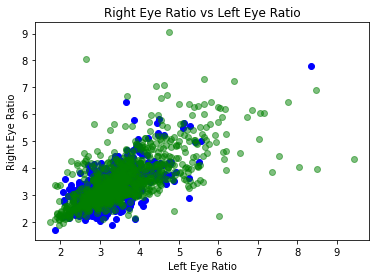

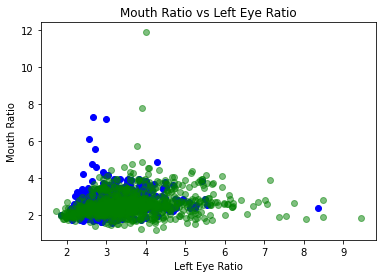

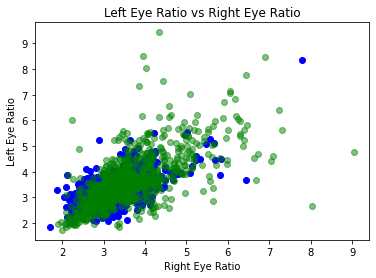

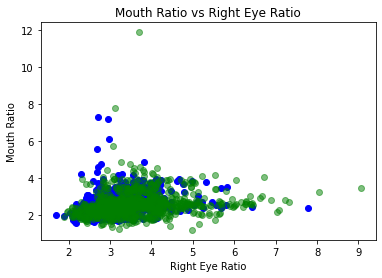

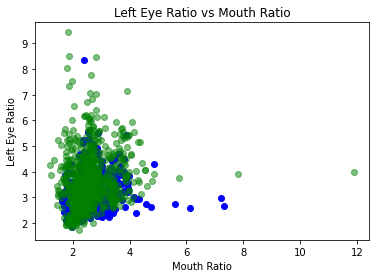

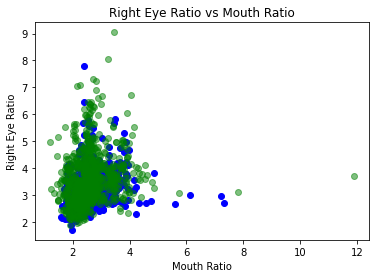

In [13]:
zeroes = []
fives = []
tens = []
for i in range(0, len(Y)):
    if (Y.iloc[i] == 0):
#         zeroes.append([X2[i][0], X2[i][1]])
        zeroes.append(X.iloc[i, :])
    if (Y.iloc[i] == 10):
#         tens.append([X2[i][0], X2[i][1]])
        tens.append(X.iloc[i, :])

zeroes = np.array(zeroes)
tens = np.array(tens)

for i in range(3):
    for j in range(3):
        if i == j:
            continue
        plt.scatter(zeroes[:, i], zeroes[:, j], color="blue")
        plt.scatter(tens[:, i], tens[:, j], color="green", alpha=0.5)
        plt.title(X.columns[j] + " vs " + X.columns[i])
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.show()

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = "poly")
classifier.fit(X_Train2, Y_Train)

SVC(kernel='poly')

In [12]:
from sklearn.metrics import accuracy_score
Y_Pred = classifier.predict(X_Test2)
accuracy = accuracy_score(Y_Test, Y_Pred)
accuracy

0.32989690721649484

Text(0.5, 1.0, 'SVM Decision Region Boundary')

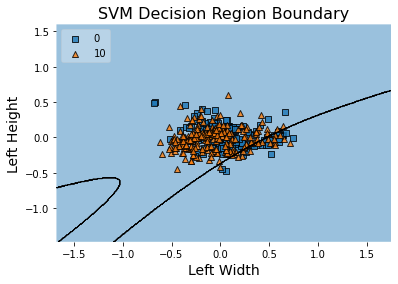

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X2, 
                      y=np.array(Y).astype(np.int64),
                      clf=classifier, 
                      legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)